<a href="https://colab.research.google.com/github/hlberghout/CHEM4420/blob/Fixing-Typos/9_58_Plancks_Law_Pretty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Integrating Planck's equation in terms of power per unit area**

9.58 Plot Planck's law of infinitesimal power flux (equation 9.23) versus wavelength at various temperatures.  Integrate it to show that you can get the Stefan-Bolzmann law and constant.
---



This is a text block than can be used to explain sections of code in the program or even write a complete report. Comments within the code block can also be used as demonstrated below. The first code block of this notebook is a library declaration block defining the libraries that contain the functions that we will use and the notebook script that follows indicates how those functions are called.

In [1]:
#note that any input following a pound symbol is a comment and is ignored by the intepreter.
import matplotlib #Matplotlib is a python plotting library used in this example.
import matplotlib.pyplot as plt #pyplot provides a matlab like plotting function.
import numpy as np #NumPy is the fundamental scientific computing package in Python.
import scipy.constants as constants #SciPy physical constants library, SI units.
import scipy.integrate as integrate #SciPy Integration library
import scipy.special as special #SciPy special functions library
import seaborn #matplotlib enhancement.

This block defines the initial values of variables that are not defined elsewhere in the imported libraries above.

In [2]:
# Defined variables
T = 4500.0 #Temperature in (Kelvin)
dl = 3.0E-9 #Wavelength step size (meters)
lmax = 1.0E-5 #Maximum wavelength to plot (meters)
l = np.arange(dl, lmax, dl) #range variable for plot, start at 

The following block uses Planck's Law in terms of the infinitesimal power per unit area $\text d \mathscr{E}$ emitted in the wavelength range $\lambda$ to $\lambda + \text{d} \lambda$. 

$$\text {d} \mathscr{E} = \frac{2 \pi h c^2}{\lambda^5} \left( \frac{1}{\operatorname e ^{hc/\lambda k T} - 1} \right) d \lambda$$



---


Note that I need a better explaination here

In [3]:
#Define Planck's equation as a function
def dE(l, T):
 return 2*constants.pi*constants.h*constants.c**2/l**5*(1/(np.exp(np.float128(constants.h*constants.c/(l*constants.k*T)))-1)) 
 #note that the exponetial argument is too large to be evaluated with a 64-bit exp, so changed to 128-bit.

Finally, this block of code produces the plot that allows us to visualize the function.

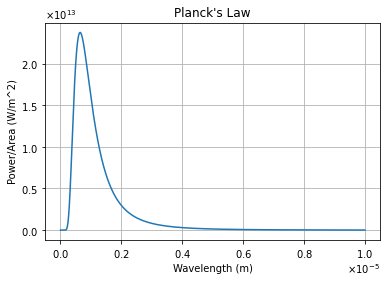

In [4]:
#Plot Planck's equation at temperature T.
fig = plt.figure()
ax = plt.axes()
ax.plot(l, dE(l, T))
ax.set(xlabel='Wavelength (m)', ylabel='Power/Area (W/m^2)',
       title="Planck's Law")
ax.grid()
plt.ticklabel_format(style='sci', axis='both',scilimits=(-3,4), useMathText='True')
plt.show()

Finally, we apply the scipy integrate function to evaluate the integral and compare the integrated intensity to that predicted by the Stefan-Boltzmann law and constant.  Not that this is a numerical integration and does not reach to infinite wavelengths.  This trancated integral may in part account for the slight under estimate of the  Stefan-Boltzmann Constant.

In [5]:
E = integrate.quad(dE, 0, lmax, args=(T))
print(T, "Kelvins") 
print("Integrated Intensity: ", "%10.6E"% E[0], "W/m^2")
print("Estimated Error: ", "%10.6E"% E[1], "W/m^2")

sigma = E[0]/T**4
PercentDeltasigma = (sigma-constants.sigma)/constants.sigma*100

print("Estimated Stefan-Boltzmann Constant: ", "%10.6E"% sigma, "W/m^2/K^4")
print("Compare to literature: 5.670400E-8 W/m^2/K^4")
print("Percent difference: ", "%10.3E"% PercentDeltasigma, "%")

4500.0 Kelvins
Integrated Intensity:  2.321755E+07 W/m^2
Estimated Error:  1.629608E-06 W/m^2
Estimated Stefan-Boltzmann Constant:  5.661953E-08 W/m^2/K^4
Compare to literature: 5.670400E-8 W/m^2/K^4
Percent difference:  -1.485E-01 %
